In [1]:
# import necessary package
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# set up a few variables
inDir = '/Users/yuntse/data/supernova/flux/rf5.78'
outDir = '/Users/yuntse/data/supernova/flux/rf5.78_normalize'
fFactor = inDir + '/iinterpolation-data.txt'

In [3]:
# create the output directory if it doesn't exist
import os
if not os.path.exists(outDir):
    os.mkdir(outDir)

In [4]:
# import the normalization factor provided by Payel
normalize_data = np.loadtxt( fFactor )

In [5]:
# You can view the normalization factor loaded in this notebook
# Each row vector contains the information: (time, normalization)
normalize_data

array([[1.8    , 1.21739],
       [1.82   , 1.20435],
       [1.84   , 1.1913 ],
       [1.86   , 1.17826],
       [1.88   , 1.16522],
       [1.9    , 1.15217],
       [1.92   , 1.13913],
       [1.94   , 1.12609],
       [1.96   , 1.11304],
       [1.98   , 1.1    ],
       [2.     , 1.08696],
       [2.02   , 1.07826],
       [2.04   , 1.06957],
       [2.06   , 1.06087],
       [2.08   , 1.05217],
       [2.1    , 1.04348],
       [2.12   , 1.03478],
       [2.14   , 1.02609],
       [2.16   , 1.01739],
       [2.18   , 1.0087 ],
       [2.2    , 1.     ],
       [2.22   , 0.9913 ],
       [2.24   , 0.98261],
       [2.26   , 0.97391],
       [2.28   , 0.96522],
       [2.3    , 0.95652],
       [2.32   , 0.94783],
       [2.34   , 0.93913],
       [2.36   , 0.93043],
       [2.38   , 0.92174],
       [2.4    , 0.91304],
       [2.42   , 0.90435],
       [2.44   , 0.89565],
       [2.46   , 0.88696],
       [2.48   , 0.87826],
       [2.5    , 0.86957],
       [2.52   , 0.86087],
 

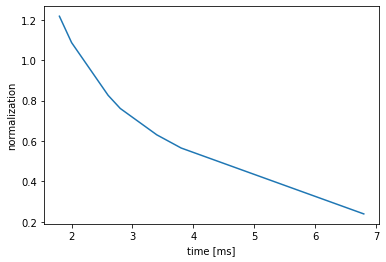

In [6]:
# Plot the normalization factor versus time
plt.plot(normalize_data[:,0], normalize_data[:,1])
plt.xlabel('time [ms]')
plt.ylabel('normalization')
plt.show()

In [7]:
# Setup a script to load the non-normalized flux in the 'sn_flux' folder and times the normalization factor
flux = np.loadtxt(inDir + '/rf' + str(normalize_data[0,0]) + '.dat')

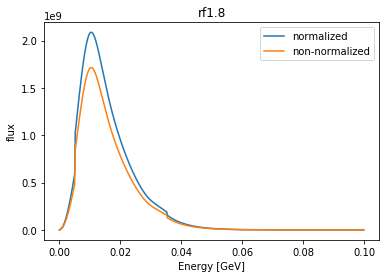

In [8]:
plt.plot(flux[:,0], normalize_data[0,1]*flux[:,1], label = 'normalized')
plt.plot(flux[:,0], flux[:,1], label = 'non-normalized')
plt.xlabel('Energy [GeV]')
plt.ylabel('flux')
plt.title('rf1.8')
plt.legend()
plt.show()

In [9]:
# Writing a batch script to correct all the flux with proper normalization factor and save it
for i in range(len(normalize_data)):
    # load the non-normalized flux rfx.x.dat in the 'flux' folder
    # x.x is the time stamp of the flux given in the first column of the normalize_data
    sn_flux = np.loadtxt(inDir + '/rf' + str(normalize_data[i,0]) + '.dat')

    # Times the normalization factor to the flux
    sn_flux[:,1:] = sn_flux[:,1:]*normalize_data[i,1]
    
    # Save the corrected flux to the new folder 'corrected_flux'
    np.savetxt(outDir + '/rf' + str(normalize_data[i,0]) + '_normalized.dat', sn_flux, fmt='%.5e')
    
    # If the time stamp x.x > 5.98, there is no corresponding flux to be normalized,
    # we should break the for-loop
    # Some comment: Write down the if-else block to break the for-loop in the bottom of this script
    # is not a quite good in my sense. One should move this if-else block to the top of this script.
    # You should try to modify this if-else block and move it to the top.
    if normalize_data[i,0]==5.98:
        break
    else:
        pass
    
# After running this script, you should find the fluxes that are needed normalizations
# in the 'normalized_flux' folder

In [10]:
# Check our normalized flux
norm_sn_flux = np.loadtxt(outDir + '/rf1.8_normalized.dat')

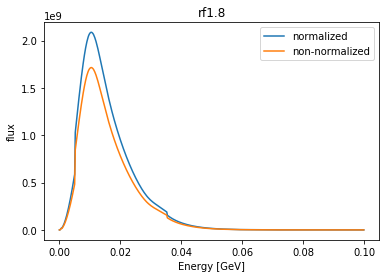

In [11]:
# Plot the result, this figure must be the same as the last figure
plt.plot(flux[:,0], norm_sn_flux[:,1], label = 'normalized')
plt.plot(flux[:,0], flux[:,1], label = 'non-normalized')
plt.xlabel('Energy [GeV]')
plt.ylabel('flux')
plt.title('rf1.8')
plt.legend()
plt.show()

In [12]:
# # Copy the files which don't have to be normalized
# # List all the input files
# list = os.listdir(inDir)

In [13]:
# for f in list:
#     # if the file is the normalization factor file, skip it 
#     # (because I put this file in the same directory as the other flux files)
#     if f[-3:] == 'txt':
#         continue
#     # if not, it is a flux file.  Check if the time slice is in the normalization factor file
#     # if the time slice doesn't exist in the normalization factor file, copy the original file to the new directory
#     if not f[2:-4] in str(normalize_data[:,0]):
#         srcFile = inDir + '/' + f
#         dstFile = outDir + '/' + f[:-4] + '_normalized.dat'
#         command = 'cp ' + srcFile + ' ' + dstFile
#         # print(command)
#         os.system(command)

In [14]:
# # Sanity check
# flux2 = np.loadtxt(inDir + '/rf1.28.dat')
# norm_sn_flux2 = np.loadtxt(outDir + '/rf1.28_normalized.dat')

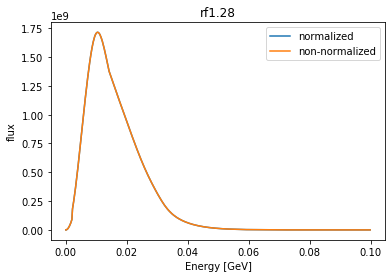

In [15]:
# # Plot the result, the two curves here should be identical since one is a copy of the other
# plt.plot(flux2[:,0], norm_sn_flux2[:,1], label = 'normalized')
# plt.plot(flux2[:,0], flux2[:,1], label = 'non-normalized')
# plt.xlabel('Energy [GeV]')
# plt.ylabel('flux')
# plt.title('rf1.28')
# plt.legend()
# plt.show()